In [1]:
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=bedcc9d34c604448f2c7ff1388e37081e2ee5b3386144387af518b525daff12b
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython import display
import os
from PIL import Image
from torch.utils.data.dataset import Dataset
from torch.autograd import Variable

time: 3.02 s


In [0]:

hyperparams = {'l1_out': 512,
                  'l2_out': 512,
                  'l1_drop': 0.5,
                  'l2_drop': 0.5,
                  'batch_size': 32,
                  'epochs': 5}


train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('mnist-data/', train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor(),])),
        batch_size=hyperparams['batch_size'], shuffle=True)

test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('mnist-data/', train=False, transform=transforms.Compose([transforms.ToTensor(),])
                       ),
        batch_size=hyperparams['batch_size'], shuffle=True)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, hyperparams['l1_out'])
        self.dropout1 = nn.Dropout(hyperparams['l1_drop'])
        self.fc2 = nn.Linear(hyperparams['l1_out'], hyperparams['l2_out'])
        self.dropout2 = nn.Dropout(hyperparams['l2_drop'])
        self.fc3 = nn.Linear(hyperparams['l2_out'], 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x) #exponentiate logits to retrieve predicted probabilities



In [9]:
net_trained = Net()
net_trained.train()
# create an Adam optimizer
optimizer = optim.Adam(net_trained.parameters(), lr=0.001)
# create a loss function
criterion = nn.CrossEntropyLoss()

epochs = hyperparams['epochs']

# run the main training loop
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net_trained(data)
        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 500 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                           100. * batch_idx / len(train_loader), loss.data))
            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.300746
Train Epoch: 0 [16000/60000 (27%)]	Loss: 0.083377
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.186018
Train Epoch: 0 [48000/60000 (80%)]	Loss: 0.311338
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.013656
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.024796
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.011382
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.049497
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.021566
Train Epoch: 2 [16000/60000 (27%)]	Loss: 0.006836
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.038105
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.055847
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.001605
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.017032
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.001622
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.007173
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.002055
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.001304
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.207564
Train Epoch: 4 [48000/60000 (80%)]	Loss: 0.002137
time: 2min 5s


In [10]:
f = 'model'
torch.save(net_trained.state_dict(), f)

time: 6.13 ms


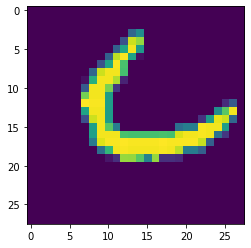

6
time: 814 ms


In [11]:
# try this on just ONE new image from the test set
import matplotlib.pyplot as plt
import random


for test_images, test_labels in test_loader:  
    sample_image = test_images[0]    # Reshape them according to your needs.
    sample_label = test_labels[0]

sample_image_modified = sample_image.permute(1, 2, 0)
plt.imshow(sample_image_modified.numpy().squeeze())
plt.show()
print(sample_label.item())

In [19]:
trained = False
net_trained.load_state_dict(torch.load(f))
net_untrained = Net()


if trained:
  output = net_trained(sample_image.flatten()) # sample image has dimensions 28*28, needs to be 784
  #print(output) # list of 10 elements; class-specific logits pre-activation.
  print(sample_label.item())
  predictive_probs = np.exp(output.detach())
  print(predictive_probs)

  _, prediction = output.max(0)
  print(prediction.item())
else:
  output = net_untrained(sample_image.flatten()) # sample image has dimensions 28*28, needs to be 784
  #print(output) # list of 10 elements; class-specific logits pre-activation.
  print(sample_label.item())
  predictive_probs = np.exp(output.detach())
  print(predictive_probs)

  _, prediction = output.max(0)
  print(prediction.item())

6
tensor([0.0933, 0.1063, 0.0996, 0.0908, 0.1031, 0.0969, 0.1001, 0.0994, 0.1060,
        0.1046])
1
time: 20.7 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


See
https://gitlab.com/wdeback/dl-keras-tutorial/blob/master/notebooks/3-cnn-segment-retina-uncertainty.ipynb

In [20]:
T = 3 # how many times to apply drop-out at test time

def apply_dropout(m):
    if type(m) == nn.Dropout:
        m.train()

def uncertainties(p):
    aleatoric = np.mean(p*(1-p), axis=0)
    epistemic = np.mean(p**2, axis=0) - np.mean(p, axis=0)**2
    return aleatoric, epistemic


def predict(model, image, label, T=T):
    model.eval()
    model.apply(apply_dropout) # STILL NOT WORKING WITH DROPOUT AT TEST-TIME
    # prepare label
    label = label.item()
    # prepare image
    image = image.flatten()
    standard_output = model(image)
    _, standard_prediction = standard_output.max(0)
    # each vector will consist of T elements- the class-specific predictive probability from each model
    zero_p_hat= []
    one_p_hat= []
    two_p_hat= []
    three_p_hat= []
    four_p_hat= []
    five_p_hat= []
    six_p_hat= []
    seven_p_hat= []
    eight_p_hat= []
    nine_p_hat= []

    # predict stochastic dropout model T times
    for t in range(T):
        output = model(image)
        output = output.detach()
        output_prob = np.exp(output) #convert to predictive probabilities

        zero_p_hat.append(output_prob[0].item()) # P( c = 0 | image)
        one_p_hat.append(output_prob[1].item()) # P( c = 1 | image)
        two_p_hat.append(output_prob[2].item()) # P( c = 2 | image)
        three_p_hat.append(output_prob[3].item()) # P( c = 3 | image)
        four_p_hat.append(output_prob[4].item()) # P( c = 4 | image)
        five_p_hat.append(output_prob[5].item()) # P( c = 5 | image)
        six_p_hat.append(output_prob[6].item()) # P( c = 6 | image)
        seven_p_hat.append(output_prob[7].item()) # P( c = 7 | image)
        eight_p_hat.append(output_prob[8].item()) # P( c = 8 | image)
        nine_p_hat.append(output_prob[9].item()) # P( c = 9 | image)

    # mean prediction
    zero_var = np.var(zero_p_hat)
    one_var = np.var(one_p_hat)
    two_var = np.var(two_p_hat)
    three_var = np.var(three_p_hat)
    four_var = np.var(four_p_hat)
    five_var = np.var(five_p_hat)
    six_var = np.var(six_p_hat)
    seven_var = np.var(seven_p_hat)
    eight_var = np.var(eight_p_hat)
    nine_var = np.var(nine_p_hat)
    
    # will be a list of 10 elements, the variance of each class's predictions across T models
    class_specific_uncertainties = [zero_var, one_var, two_var, three_var, four_var, five_var, six_var, seven_var, eight_var, nine_var]
    variance_of_class_specific_predictions = class_specific_uncertainties[label]
    
    # estimate uncertainties (eq. 4 )
    # eq.4 in https://openreview.net/pdf?id=Sk_P2Q9sG
    # see https://github.com/ykwon0407/UQ_BNN/issues/1
    p_hat_lists = [zero_p_hat, one_p_hat, two_p_hat, three_p_hat, four_p_hat, five_p_hat, six_p_hat, seven_p_hat, eight_p_hat, nine_p_hat]
    epistemic, aleatoric = uncertainties(np.array(p_hat_lists[label]))

    return standard_prediction.item(), variance_of_class_specific_predictions, np.squeeze(aleatoric), np.squeeze(epistemic), p_hat_lists[label]

time: 53.8 ms


In [21]:
prediction, var_uncertainty, aleatoric, epistemic, _ = predict(net_untrained, sample_image, sample_label)
print("\n The model predicts: {} \n The ground truth is {}.\n With drop-out at test-time {} times, variance of class-specific predictions across the models is {}. \n Finally, aleatoric and epistemic uncertainties are {} and {}.\n The models give predictive probabilities: {}".format(prediction, sample_label, T, var_uncertainty, aleatoric, epistemic, _))


 The model predicts: 1 
 The ground truth is 6.
 With drop-out at test-time 3 times, variance of class-specific predictions across the models is 0.0. 
 Finally, aleatoric and epistemic uncertainties are 0.0 and 0.09009235121962117.
 The models give predictive probabilities: [0.10011545568704605, 0.10011545568704605, 0.10011545568704605]
time: 9.18 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
